---
# Código elaborado por Morales Ramírez Ángel Franciso [LinkedIn](https://www.linkedin.com/in/francisco-morales-actuario/)
---

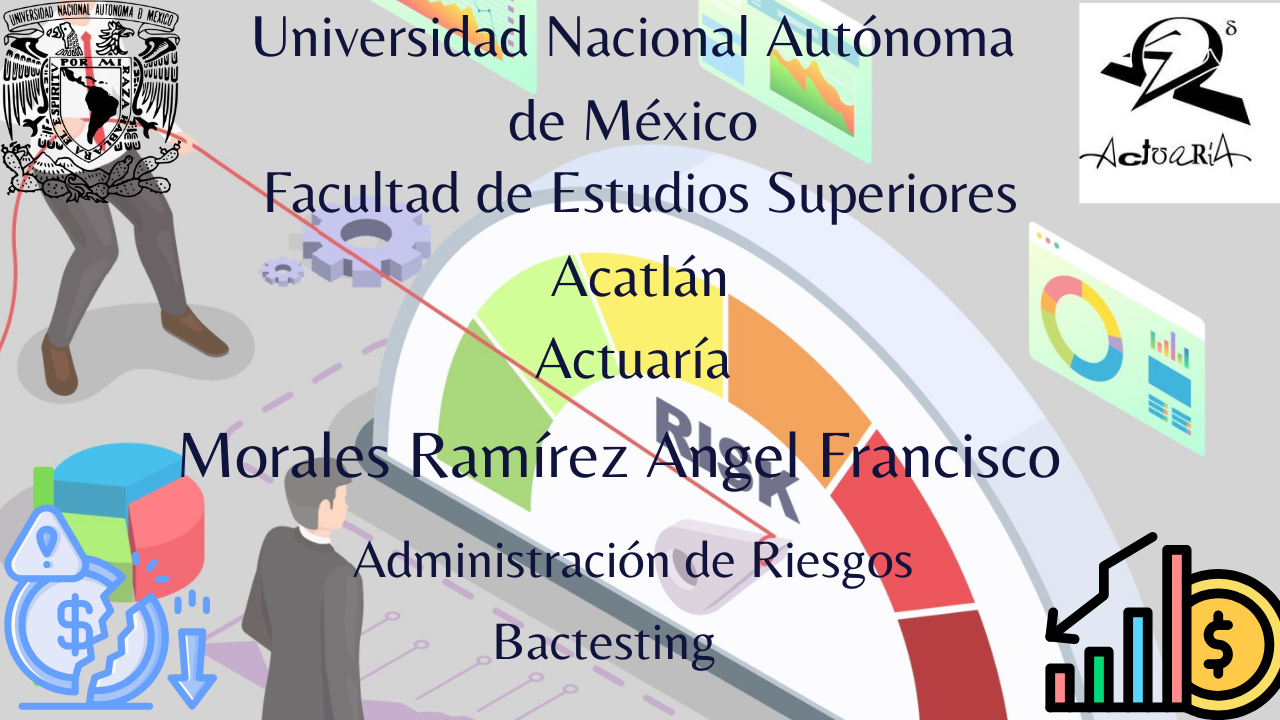

---
# Importación de librerías🐍
---

In [1]:
#Librerías a utilizar
#Usar información de yahoo finance
import yfinance as yf
#Manipular Dataframes
import pandas as pd
#Calculos matemáticos
import numpy as np
#Gráficos
import plotly.graph_objects as go
import matplotlib.pyplot as plt
#Distribuciones estadísticas
import scipy.stats as stats


---

# Indicaciones👨‍🏫

---

*   Ejecicio extra
*   Programar el Bactesting del VaR de simulaciones y el histórico en Python
*  2 puntos extra para el primer parcial



---
# Construcción del Portafolio 💼
---

---
## Acciones y títulos 🗃️
---

In [2]:
#Acciones del Mercado Local
Tickers=['CEMEXCPO.MX','CUERVO.MX','LACOMERUBC.MX','GRUMAB.MX','VOLARA.MX','BIMBOA.MX','AGUA.MX']
#Titulos que forman parte del portafolio
Titules=[800,200,250,100,700,200,250]

---
##Información de Yahoo Finance 💰
---

In [3]:
#Función para la extracción de precios Yahoo Finance
def get_data(symbol: str):
    data=yf.download(tickers=symbol,period='504d',interval='1d')
    data.reset_index(inplace=True)
    return data

In [4]:
dataframes=[]
df_back_his=pd.DataFrame()

for Ticker in Tickers:
    #Obtener los datos con la función definida en la celda anterior
    data=get_data(Ticker)

    #Renombrar columnas por cada Ticker o Acción que forma parte de mi portafolio
    data=data.set_axis(['Date',f'Close_{Ticker}','High','Low','Open','Volume'], axis=1)

    if df_back_his.empty:
        df_back_his=data[['Date',f'Close_{Ticker}']]
    else:
        df_back_his=pd.merge(df_back_his,data[['Date',f'Close_{Ticker}']],on='Date',how='outer')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


---

# Bactesting para el VaR Histórico📝

---

In [5]:
#Creamos el Portafolio para el Backtesting
df_back_his

,Date,Close_CEMEXCPO.MX,Close_CUERVO.MX,Close_LACOMERUBC.MX,Close_GRUMAB.MX,Close_VOLARA.MX,Close_BIMBOA.MX,Close_AGUA.MX
0,2023-04-17,10.815823,43.410820,39.753002,247.746536,21.889999,90.484489,25.948826
1,2023-04-18,10.636555,42.396278,39.141113,251.062698,21.420000,89.250885,25.407433
2,2023-04-19,10.566839,42.220680,39.377975,246.828064,21.400000,88.545959,24.828049
3,2023-04-20,10.497125,42.513340,39.210197,255.152359,21.299999,91.414604,24.847044
4,2023-04-21,10.307898,42.054844,38.894382,253.218719,21.160000,90.288689,25.511913
...,...,...,...,...,...,...,...,...
499,2025-04-10,10.250000,20.139999,36.119999,368.000000,9.700000,57.790001,11.200000
500,2025-04-11,10.500000,20.910000,35.980000,367.470001,9.630000,58.290001,10.760000
501,2025-04-14,10.750000,20.750000,36.750000,371.380005,9.230000,59.330002,10.910000
502,2025-04-15,10.540000,20.690001,36.970001,371.750000,9.160000,59.240002,10.790000


---

## Calculo de precios de cierre y rendimientos💲

---

In [6]:
#Calcular los rendimientos de cada activo , con los precios de cierre del dataframe anterior
for Ticker in Tickers:
    df_back_his[f'Rend_{Ticker}']= df_back_his[f'Close_{Ticker}']/ df_back_his[f'Close_{Ticker}'].shift(1)-1

df_back_his

,Date,Close_CEMEXCPO.MX,Close_CUERVO.MX,Close_LACOMERUBC.MX,Close_GRUMAB.MX,Close_VOLARA.MX,Close_BIMBOA.MX,Close_AGUA.MX,Rend_CEMEXCPO.MX,Rend_CUERVO.MX,Rend_LACOMERUBC.MX,Rend_GRUMAB.MX,Rend_VOLARA.MX,Rend_BIMBOA.MX,Rend_AGUA.MX
0,2023-04-17,10.815823,43.410820,39.753002,247.746536,21.889999,90.484489,25.948826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-04-18,10.636555,42.396278,39.141113,251.062698,21.420000,89.250885,25.407433,-0.016575,-0.023371,-0.015392,0.013385,-0.021471,-0.013633,-0.020864
2,2023-04-19,10.566839,42.220680,39.377975,246.828064,21.400000,88.545959,24.828049,-0.006554,-0.004142,0.006051,-0.016867,-0.000934,-0.007898,-0.022804
3,2023-04-20,10.497125,42.513340,39.210197,255.152359,21.299999,91.414604,24.847044,-0.006597,0.006932,-0.004261,0.033725,-0.004673,0.032397,0.000765
4,2023-04-21,10.307898,42.054844,38.894382,253.218719,21.160000,90.288689,25.511913,-0.018027,-0.010785,-0.008054,-0.007578,-0.006573,-0.012317,0.026758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,2025-04-10,10.250000,20.139999,36.119999,368.000000,9.700000,57.790001,11.200000,-0.057904,0.009524,-0.022727,0.007584,-0.064609,-0.021669,0.000000
500,2025-04-11,10.500000,20.910000,35.980000,367.470001,9.630000,58.290001,10.760000,0.024390,0.038232,-0.003876,-0.001440,-0.007216,0.008652,-0.039286
501,2025-04-14,10.750000,20.750000,36.750000,371.380005,9.230000,59.330002,10.910000,0.023810,-0.007652,0.021401,0.010640,-0.041537,0.017842,0.013940
502,2025-04-15,10.540000,20.690001,36.970001,371.750000,9.160000,59.240002,10.790000,-0.019535,-0.002892,0.005986,0.000996,-0.007584,-0.001517,-0.010999


---

## Media de rendimientos, valuación, pérdidas y ganancias🚀
---

In [7]:
#Media de los rendimientos
for Ticker in Tickers:
    df_back_his[f'Media_Rend_{Ticker}']=df_back_his[f'Rend_{Ticker}'].rolling(window=252).mean()

In [8]:
#Valuación del portafolio
df_back_his['Val_Port'] = sum(df_back_his[f'Close_{Ticker}'] * tit for Ticker,
                              tit in zip(Tickers, Titules)
                              )
#tail()--> Muestra los últimos valores
df_back_his['Val_Port'].tail()

,Val_Port
499,79205.999613
500,79413.000298
501,80130.000496
502,79945.000601
503,80197.499657


In [9]:
#Pedidas y ganancias ($)
#shift(1)--> resta el valor del dia anterior
df_back_his['Per_Gan($)'] = df_back_his['Val_Port'] - df_back_his['Val_Port'].shift(1)

In [10]:
#Pedidas y ganancias (%)
#shift(1)--> divide entre el valor del dia anterior
df_back_his['Per_Gan(%)'] = df_back_his['Val_Port'] / df_back_his['Val_Port'].shift(1)-1

In [11]:
#Crear una copia del dataframe que se usará para calcular el Backtesting por VaR Simulado
df_back_sim=df_back_his.copy()

---

## Elaboración backtesting histórico 💎

---

In [12]:
#VaR Histórico($)
df_back_his['VaR_His($)']=np.nan

#Se toma del dia 252 en adelante
for k in range(252, len(df_back_his)):
    port_sim = []
#Se calcula para el último año (252 días)
    for j in range(252):
        gan_per_por = 0
#Se calcula en rendmiento para cada acción
        for i, Ticker in enumerate(Tickers):
            tit = Titules[i]
            pre_0 = df_back_his.loc[k, f'Close_{Ticker}']
            rend_sim = df_back_his.loc[k - j, f'Rend_{Ticker}']
#Se estima la ganancias o perdida por acción
            gan_per_sim = rend_sim * pre_0 * tit
#Se obtiene las ganancias o pérdidas del portafolio para cada día
            gan_per_por += gan_per_sim

        port_sim.append(gan_per_por)

#Se guarda en el dataframe el VaR histórico en $
    VaR_His = np.percentile(port_sim, 1)
    df_back_his.loc[k, 'VaR_His($)'] = VaR_His

In [13]:
#VaR Histórico(%)
df_back_his['VaR_His(%)']=df_back_his['VaR_His($)']/df_back_his['Val_Port']

---

## Excepciones, eficencia y gráfica 🤑

---

In [14]:
#Conteo de excepciones
df_back_his['Excepciones']=(df_back_his['Per_Gan(%)']<df_back_his['VaR_His(%)'])
Excep_His=df_back_his['Excepciones'].sum()
Excep_His

np.int64(6)

In [15]:
#Eficiciencia
Efi_His=round(Excep_His/252,4)
Efi_His

np.float64(0.0238)

In [16]:
#Exportar los datos a un excel
df_back_his.to_excel('Back_VaR_His.xlsx',index=False)

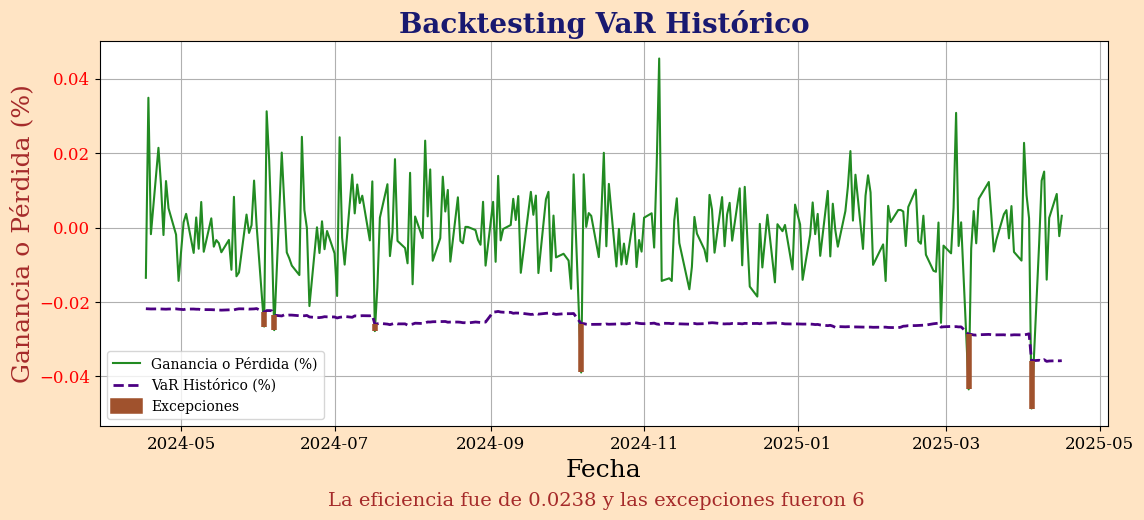

In [17]:
#Gráfica
#Tomamos solo los datos del último año ya que solo nos interesa graficar
#las simulaciones del VaR Histótico
y=df_back_his['Date'].tail(252)
x_1=df_back_his['Per_Gan(%)'].tail(252)
x_2=df_back_his['VaR_His(%)'].tail(252)
z=df_back_his['Excepciones'].tail(252)

# Crearmos la figura
# facecolor--> color  de fondo
plt.figure(figsize=(13, 5),facecolor='bisque')
#Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'

# Creamos la linea de perdidas y ganancias reales  en color verde
plt.plot(y, x_1, label='Ganancia o Pérdida (%)', color='forestgreen',
        linewidth=1.5)

# Mostrar VaR Histórico (%)
plt.plot(y, x_2 , label='VaR Histórico (%)', color='indigo',
         linewidth=2,linestyle="dashed")

# Se agregan las excepciones
plt.fill_between(y, x_2, x_1,
                 where=z==True, color='sienna', alpha=1,
                linewidth=4, hatch="*" ,
                zorder=2,label='Excepciones')

# where--> Condición
#color --> Color de la figura
#alpha --> Tranparencia entre 0 (transparencia total) y 1 (nada transparente)
#linewidth=4 --> Grosor de linea
#hatch -->Relleno de la forma
#zorder-->Capa 0 (Hasta el fondo) y si es grande estara delante en el gráfico
# Añadimos una leyenda
plt.legend()
# Agregar título
#fontweight='bold'-->Negritas
plt.title("Backtesting VaR Histórico", fontsize=20,
          color='midnightblue', fontweight='bold')
# Agregar etiquetas en el eje x & y , con tamaño y color personalizado
plt.xlabel('Fecha',fontsize = 18, color = 'black')
plt.ylabel('Ganancia o Pérdida (%)',fontsize = 18, color = 'brown')
#Personalizar los valores del eje x & y
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='red')
# Activar bordes
plt.grid(True)
#Se agrega Eficiencia y excepciones en el gráfico
plt.figtext(0.30, -0.05, f"La eficiencia fue de {Efi_His} y las excepciones fueron {Excep_His}" ,
            fontsize = 14, color='brown')
# Mostrar la grafica
plt.show()


---

# Bactesting para el VaR Simulado📋

---

In [18]:
#Backtesting por VaR simulado
df_back_sim.head()

,Date,Close_CEMEXCPO.MX,Close_CUERVO.MX,Close_LACOMERUBC.MX,Close_GRUMAB.MX,Close_VOLARA.MX,Close_BIMBOA.MX,Close_AGUA.MX,Rend_CEMEXCPO.MX,Rend_CUERVO.MX,...,Media_Rend_CEMEXCPO.MX,Media_Rend_CUERVO.MX,Media_Rend_LACOMERUBC.MX,Media_Rend_GRUMAB.MX,Media_Rend_VOLARA.MX,Media_Rend_BIMBOA.MX,Media_Rend_AGUA.MX,Val_Port,Per_Gan($),Per_Gan(%)
0,2023-04-17,10.815823,43.410820,39.753002,247.746536,21.889999,90.484489,25.948826,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91954.830170,NaN,NaN
1,2023-04-18,10.636555,42.396278,39.141113,251.062698,21.420000,89.250885,25.407433,-0.016575,-0.023371,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91076.082802,-878.747368,-0.009556
2,2023-04-19,10.566839,42.220680,39.377975,246.828064,21.400000,88.545959,24.828049,-0.006554,-0.004142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90321.111488,-754.971313,-0.008289
3,2023-04-20,10.497125,42.513340,39.210197,255.152359,21.299999,91.414604,24.847044,-0.006597,0.006932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91622.834301,1301.722813,0.014412
4,2023-04-21,10.307898,42.054844,38.894382,253.218719,21.160000,90.288689,25.511913,-0.018027,-0.010785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90950.470352,-672.363949,-0.007338


---

## Cálculo de volatilidad🎢

---

In [19]:
#Se calcula la volatilidad
λ =0.95
for ticker in Tickers:
#Columna Vol para cada ticker
    df_back_sim[f"Vol_{ticker}"] = np.nan
#Se toman los primeros 252 valores
    for i in range(1, 253):
        d = 0
        t = 0
#Se recorren un dia a partir del dia 252 (252+i)
        for j in range(0 + i, 252 + i):
#Se calcual el valor de din elevando el rendimiento al cuadrado
#multiplicandolo por su peso correnpondiente
            d += (df_back_sim[f"Rend_{ticker}"][j] ** 2) * (λ  ** (251 - t))
            t += 1
#Se anualiza la volatilidad y se saca su raiz
        vol = np.sqrt(((1 - λ ) * d)) * np.sqrt(252)
#Se guarda la volatilidad en el dataframe
        df_back_sim.loc[251 + i, f"Vol_{ticker}"] = vol

In [20]:
#Verificar que se agrego la volatilidad
df_back_sim.head()

,Date,Close_CEMEXCPO.MX,Close_CUERVO.MX,Close_LACOMERUBC.MX,Close_GRUMAB.MX,Close_VOLARA.MX,Close_BIMBOA.MX,Close_AGUA.MX,Rend_CEMEXCPO.MX,Rend_CUERVO.MX,...,Val_Port,Per_Gan($),Per_Gan(%),Vol_CEMEXCPO.MX,Vol_CUERVO.MX,Vol_LACOMERUBC.MX,Vol_GRUMAB.MX,Vol_VOLARA.MX,Vol_BIMBOA.MX,Vol_AGUA.MX
0,2023-04-17,10.815823,43.410820,39.753002,247.746536,21.889999,90.484489,25.948826,NaN,NaN,...,91954.830170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-04-18,10.636555,42.396278,39.141113,251.062698,21.420000,89.250885,25.407433,-0.016575,-0.023371,...,91076.082802,-878.747368,-0.009556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-04-19,10.566839,42.220680,39.377975,246.828064,21.400000,88.545959,24.828049,-0.006554,-0.004142,...,90321.111488,-754.971313,-0.008289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-04-20,10.497125,42.513340,39.210197,255.152359,21.299999,91.414604,24.847044,-0.006597,0.006932,...,91622.834301,1301.722813,0.014412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-04-21,10.307898,42.054844,38.894382,253.218719,21.160000,90.288689,25.511913,-0.018027,-0.010785,...,90950.470352,-672.363949,-0.007338,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

## Elaboración backtesting simulado 💵
---

In [21]:
#Diccionario t_a (títulos-acción)
t_a = {}
for i, Ticker in enumerate(Tickers):
    t_a[Ticker] = Titules[i]
# Número de simulaciones
sim = 1000
#Columna VaR_Sim en el dataframe
df_back_sim["VaR_Sim($)"] = np.nan

#Se toma del dia 252 en adelante
for i in range(252, len(df_back_sim)):
    por_sim = []

#Se ejecuta para el número de simulaciones deseadas
    for _ in range(sim):
        gan_sum_pro = 0

#Se estima la ganancias o perdida por acción
        for ticker in Tickers:
#np.random.randn()-->Número proveniente de una distribución normal
            Z = np.random.randn()
            pre_0 = df_back_sim.loc[i, f"Close_{ticker}"]
            media = df_back_sim.loc[i, f"Media_Rend_{ticker}"]
#Se llama a la vol calcula en la celda anterior
            vol = df_back_sim.loc[i, f"Vol_{ticker}"]

            pre_sim = pre_0 * (1 + media + vol * Z * np.sqrt(1 / 252))
#Se obtiene las ganancias o perdidas del portafolio para cada día
            gan = (pre_sim - pre_0) * t_a[ticker]
            gan_sum_pro += gan
        por_sim.append(gan_sum_pro)

#Se guarda en el dataframe el VaR histórico en $
    VaR_Sim= np.percentile(por_sim, 1)
    df_back_sim.loc[i, "VaR_Sim($)"] = VaR_Sim

In [22]:
#VaR Simulado(%)
df_back_sim['VaR_Sim(%)']=df_back_sim['VaR_Sim($)']/df_back_sim['Val_Port']

---

## Excepciones, eficencia y gráfica 💸

---

In [23]:
#Conteo de excepciones
df_back_sim['Excepciones']=(df_back_sim['Per_Gan(%)']<df_back_sim['VaR_Sim(%)'])
Excep_Sim=df_back_sim['Excepciones'].sum()
Excep_Sim

np.int64(7)

In [24]:
#Eficiciencia
Efi_Sim=round(Excep_Sim/252,4)
Efi_Sim

np.float64(0.0278)

In [25]:
#Exportar los datos a un excel
df_back_sim.to_excel('Back_VaR_Sim.xlsx',index=False)

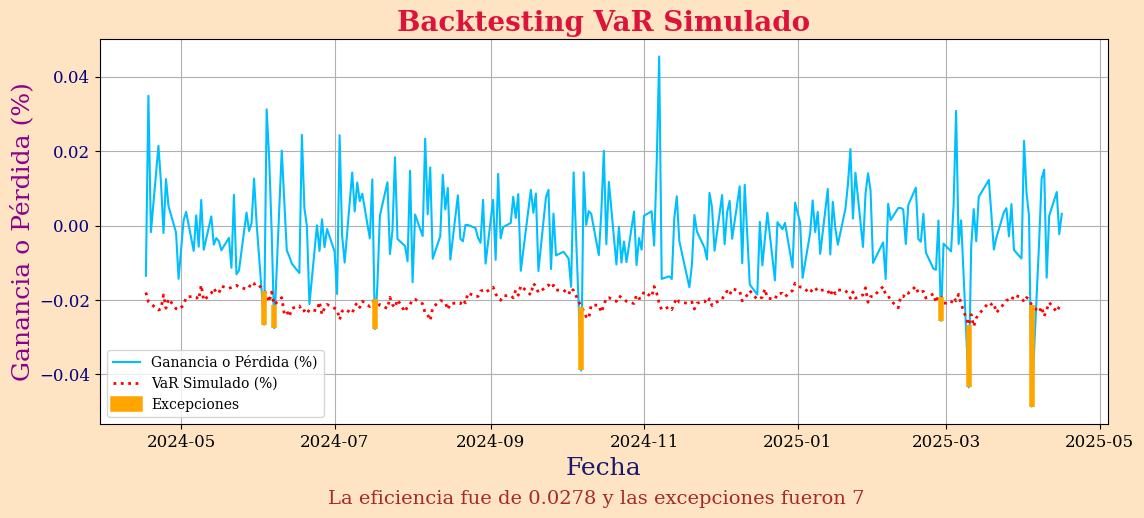

In [26]:
#Gráfica
#Tomamos solo los datos del último año ya que solo nos interesa graficar
#las simulaciones del VaR Histótico
y=df_back_sim['Date'].tail(252)
x_1=df_back_sim['Per_Gan(%)'].tail(252)
x_2=df_back_sim['VaR_Sim(%)'].tail(252)
z=df_back_sim['Excepciones'].tail(252)

# Crearmos la figura
# facecolor--> color  de fondo
plt.figure(figsize=(13, 5),facecolor='bisque')
#Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'

# Creamos la linea de perdidas y ganancias reales  en color verde
plt.plot(y, x_1, label='Ganancia o Pérdida (%)', color='deepskyblue',
        linewidth=1.5)

# Mostrar VaR Simulado (%)
plt.plot(y, x_2 , label='VaR Simulado (%)', color='red',
         linewidth=2,linestyle="dotted")

# Se agregan las excepciones
plt.fill_between(y, x_2, x_1,
                 where=z==True, color='orange', alpha=1,
                linewidth=4, hatch="*" ,
                zorder=2,label='Excepciones')

# where--> Condición
#color --> Color de la figura
#alpha --> Tranparencia entre 0 (transparencia total) y 1 (nada transparente)
#linewidth=4 --> Grosor de linea
#hatch -->Relleno de la forma
#zorder-->Capa 0 (Hasta el fondo) y si es grande estara delante en el gráfico
# Añadimos una leyenda
plt.legend()
# Agregar título
#fontweight='bold'-->Negritas
plt.title("Backtesting VaR Simulado", fontsize=20,
          color='crimson', fontweight='bold')
# Agregar etiquetas en el eje x & y , con tamaño y color personalizado
plt.xlabel('Fecha',fontsize = 18, color = 'midnightblue')
plt.ylabel('Ganancia o Pérdida (%)',fontsize = 18, color = 'darkmagenta')
#Personalizar los valores del eje x & y
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='navy')
#Se agrega en el gráfico
plt.figtext(0.30, -0.05, f"La eficiencia fue de {Efi_Sim} y las excepciones fueron {Excep_Sim}" ,
            fontsize = 14, color='brown')
# Activar bordes
plt.grid(True)

# Mostrar la grafica
plt.show()

---

# Conclusiones📚

---

Tras la realización de este trabajo se puede concluir que los resultados fueron similares a los obtenidos en clase con Excel, pero esta vez fue más rápido y automático el proceso, aun así, es necesario tener conceptos y bases sólidas respecto a la programación en Python y sobre el Backtesting, VaR histórico y simulado por eso hacer la practica en Excel me parece importante y necesario

La principal ventaja de Python es el tiempo de simulación que resulta mucho menor además de poder descargar los datos más recientes de las acciones de nuestra preferencia mediante Yahoo! Finance esto es más evidente cuando trabajos con más volumen de datos, es decir, más acciones o más simulaciones

En resumen, Excel ofrece una visualización más simple, intuitiva y sencilla, pero Python presenta mayores ventajas en la escalabilidad de los datos, automatización y velocidad de procesamiento





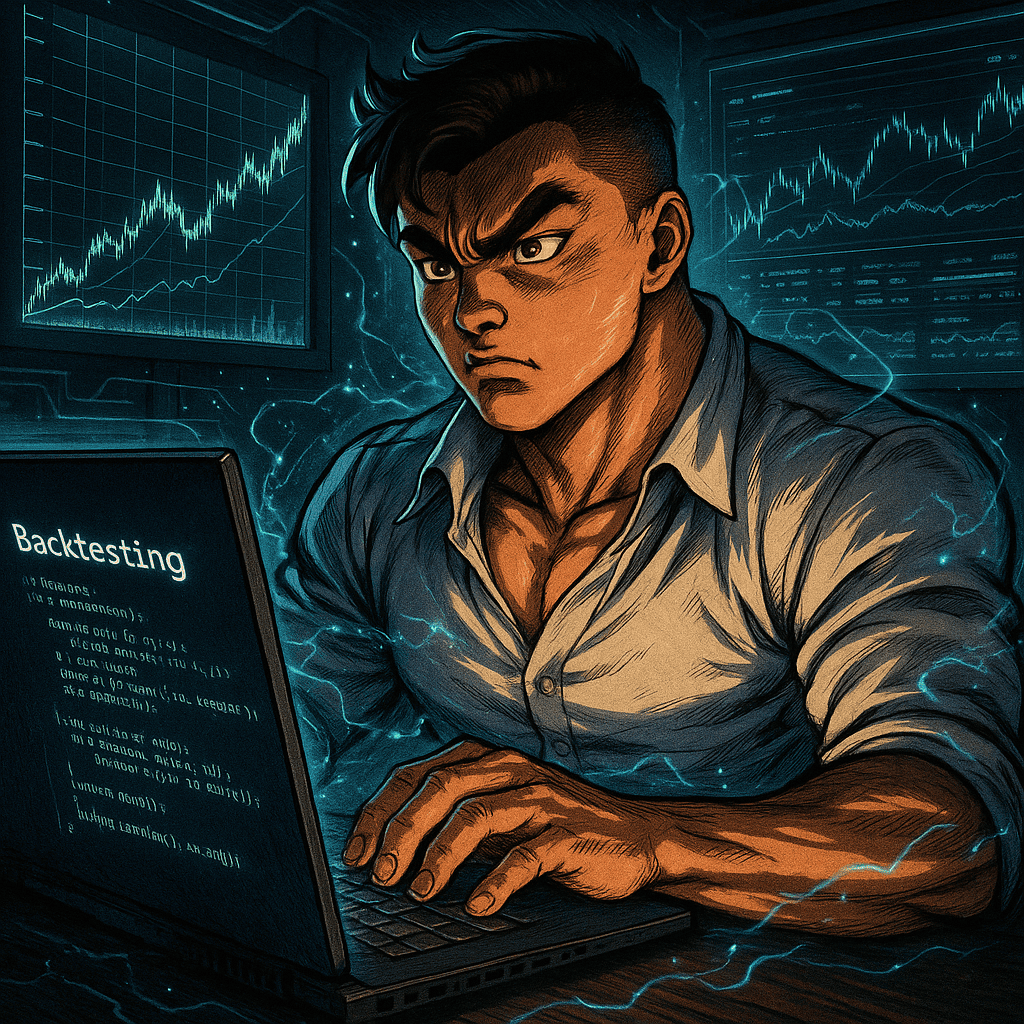

Codigo elaborado por Morales Ramímirez Angel Francisco  [LinkedIn](https://www.linkedin.com/in/francisco-morales-actuario/)